# Star Graph Problem

$$
H = \epsilon_0 S^z_0 + \sum_{i=1}^N\left[\epsilon_i S^z_i + J_i \vec{S}_0 \cdot \vec{S}_i\right]
$$

<p align="center"><img src="../figures/stargraph_.svg" width=30%></p>

$$
\Delta \epsilon_N = \frac{1}{4}J_N^2 \frac{1}{\omega - \frac{1}{2}\epsilon_0 + \frac{1}{2}\epsilon_N + \frac{1}{4}J_N} = -\frac{1}{4}J_N^2 \frac{1}{\tilde\omega - \frac{1}{2}\epsilon_0}\\
\Delta \epsilon_0 = -\frac{1}{4}J_N^2 \frac{1}{\omega - \frac{1}{2}\epsilon_0 + \frac{1}{2}\epsilon_N + \frac{1}{4}J_N} = \frac{1}{4}J_N^2 \frac{1}{\tilde\omega - \frac{1}{2}\epsilon_0}
$$

In [5]:
import itertools
from math import sqrt
import multiprocessing as mp
from multiprocessing import Pool
#mp.set_start_method('spawn')

import matplotlib
from matplotlib import pyplot as plt

import numpy as np

font = {'size'   : 17}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 7, 5
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

In [6]:
def rg(w,e0,J):
    deltae0 = (J**2/4)*1/(w - e0/2)
    if e0 * (e0 + deltae0) <= 0:
        return 0
    else:
        return e0+deltae0

In [7]:
def complete_rg(w,e0,J):
    N = 200
    x = []
    y = []
    den = w - e0/2
    for i in range(N,0,-1):
        if e0 == 0 or den * (w - e0/2) <= 0:
            return x, y, True
        x.append(i)
        y.append(e0)
        den = w - e0/2
        e0 = rg(w,e0,J)
    return x, y, False

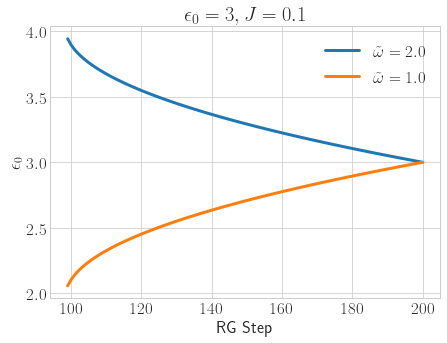

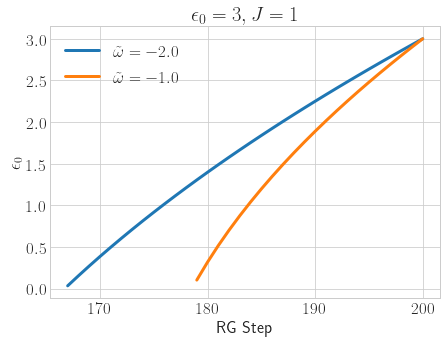

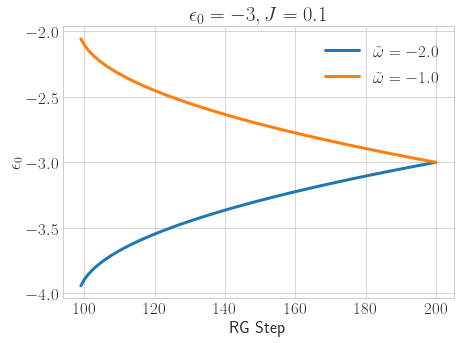

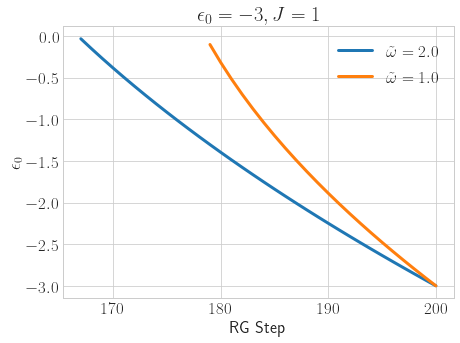

In [21]:
for e0 in [3, -3]:
    J = 0.1
    for w in [e0*2/3, e0*1/3]:
        x, y, flag = complete_rg(w, e0, J)
        # if flag:
        plt.plot(x, y, label=r"$\tilde\omega={}$".format(w))
        # plt.scatter(x, y, marker='.', color='r')
        plt.title(r"$\epsilon_0={}, J = {}$".format(e0, J))
        plt.xlabel(r"RG Step")
        plt.ylabel(r"$\epsilon_0$")
    plt.legend()
    plt.show()
    J = 1
    for w in [-e0*2/3, -e0*1/3]:
        x, y, flag = complete_rg(w, e0, J)
        # if flag:
        plt.plot(x, y, label=r"$\tilde\omega={}$".format(w))
        # plt.scatter(x, y, marker='.', color='r')
        plt.title(r"$\epsilon_0={}, J = {}$".format(e0, J))
        plt.xlabel(r"RG Step")
        plt.ylabel(r"$\epsilon_0$")
    plt.legend()
    plt.show()